# Stage 6

- has **`location_raw`**: False
- vars one-hot encoded: True
- var label-encoded: False
- oversampled: False

In [1]:
import pickle

import humanize
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.externals.joblib import parallel_backend
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split


%matplotlib inline
%load_ext autoreload

In [2]:
X_train = pickle.load(open('./data/stage6-train.pkl', 'rb'))
y_train = X_train.pop('stop_outcome')
X_test = pickle.load(open('./data/stage6-test.pkl', 'rb'))
y_test = X_test.pop('stop_outcome')

print('Row counts:\n\ttrain: {}\n\ttest: {}'.format(X_train.shape[0], X_test.shape[0]))


Row counts:
	train: 250120
	test: 62530


# Classifiers

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


class Classifier(object):
    def __init__(self, classifier):
        self.clf = classifier
        self.fitted = False
        self.name = self.get_name(self.clf)
        self.score_val = 0.0

    def get_name(self, classifier):
        return str(classifier.__class__).split('.')[-1].replace("'>", "")
        
    def fit(self, X_train, y_train):
        self.clf.fit(X_train, y_train)
        self.fitted = True

    def score(self, X_train, y_train):
        if self.fitted:
            print('Scoring...')
            self.score_val = self.clf.score(X_train, y_train)
            print(self.score_val)
        else:
            print('Please run the .fit() method first')

        
clf = {
    'sgd': Classifier(SGDClassifier()),
    'gnb': Classifier(GaussianNB()),
    'dtc': Classifier(DecisionTreeClassifier(random_state=0)),
    'rfc': Classifier(RandomForestClassifier(n_jobs=8, verbose=3, random_state=0)),
    'gbc': Classifier(GradientBoostingClassifier(random_state=0)),
    'gbc_tuned': Classifier(GradientBoostingClassifier(
    #     learning_rate=0.0983,
        max_depth=6,
    #     max_features=len(list(X_train.columns.values)),
        subsample=0.9,
        verbose=3,
        random_state=0,
    )),
}
        
    

In [4]:
# Split the 'features' and 'labels' data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(features,
#                                                     labels, 
#                                                     test_size=0.2, 
#                                                     random_state=0)
# final_test_features = pickle.load(open('./data/final_test_set.pkl', 'rb'))
# final_test_outcomes = final_test_features.pop('stop_outcome')
# print('Final test set row count: {}'.format(final_test_features.shape[0]))

# X_train = features
# y_train = labels
# X_test = final_test_features
# y_test = final_test_outcomes

# Benchmark

In [5]:
# LabelEncoded value for "Ticket" outcome is 2
predictions = [2]
accuracy_score(y_test, predictions * y_test.shape[0])

0.69125219894450662

# Simple Linear Classifier

In [6]:
clf['sgd'].fit(X_train, y_train)
clf['sgd'].score(X_test, y_test)

/home/pato/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Scoring...
0.703134495442


# GaussianNB

In [7]:
clf['gnb'].fit(X_train, y_train)
clf['gnb'].score(X_test, y_test)

Scoring...
0.207804253958


# DecisionTreeClassifier

In [8]:
clf['dtc'].fit(X_train, y_train)
clf['dtc'].score(X_test, y_test)

Scoring...
0.568990884375


# RandomForestClassifier

In [9]:
# rfc = RandomForestClassifier(n_jobs=8, verbose=3, random_state=0)
clf['rfc'].fit(X_train, y_train)
clf['rfc'].score(X_test, y_test)

building tree 2 of 10building tree 1 of 10building tree 3 of 10building tree 4 of 10building tree 5 of 10building tree 6 of 10building tree 7 of 10building tree 8 of 10







building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    1.5s remaining:    3.5s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=8)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s


Scoring...
0.702270909963


[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.1s finished


# GradientBoostingClassifier

In [10]:
# gbc = GradientBoostingClassifier(random_state=0)
clf['gbc'].fit(X_train, y_train)
clf['gbc'].score(X_test, y_test)

Scoring...
0.724468255237


## GradientBoostingClassifier (Tuned)


In [11]:
# gbc_tuned = GradientBoostingClassifier(
# #     learning_rate=0.0983,
#     max_depth=6,
# #     max_features=len(list(X_train.columns.values)),
#     subsample=0.9,
#     verbose=3,
#     random_state=0,
# )
clf['gbc_tuned'].fit(X_train, y_train)
clf['gbc_tuned'].score(X_test, y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1      274652.8409        2501.1370           20.60m
         2      257064.2214        1935.5280           20.70m
         3      243077.9772        1543.3720           20.87m
         4      231772.3726        1236.6330           21.75m
         5      222598.3276        1006.9662           21.31m
         6      215244.4735         836.4502           21.00m
         7      208856.1409         683.6747           20.98m
         8      203742.3565         567.3393           20.89m
         9      199086.8011         483.8617           20.71m
        10      195296.6410         411.5225           20.42m
        11      192120.9650         347.6956           20.26m
        12      189611.2480         297.8884           20.03m
        13      186938.9583         254.6721           19.73m
        14      184662.3656         220.2605           19.38m
        15      182830.7119         202.5215           19.29m
       

### Confusion Matrix

In [12]:
headers = ['Arrest', 'Summons', 'Ticket', 'Verbal Warning', 'Written Warning']
cm = pd.DataFrame(data=confusion_matrix(y_test, clf['gbc_tuned'].clf.predict(X_test)), columns=headers, index=headers)
cm

,Arrest,Summons,Ticket,Verbal Warning,Written Warning
Arrest,525,122,711,44,6
Summons,158,738,1661,74,26
Ticket,284,236,41085,1212,407
Verbal Warning,32,37,6069,2396,209
Written Warning,25,22,4426,1194,831


In [13]:
precision_recall_fscore_support(y_test, clf['gbc_tuned'].clf.predict(X_test), average=None)

(array([ 0.51269531,  0.63896104,  0.76151023,  0.48699187,  0.56186613]),
 array([ 0.37286932,  0.27775687,  0.9505136 ,  0.27404781,  0.1278855 ]),
 array([ 0.43174342,  0.38719832,  0.84557916,  0.35072824,  0.208349  ]),
 array([ 1408,  2657, 43224,  8743,  6498]))

In [14]:
precision_recall_fscore_support(y_test, clf['gbc_tuned'].clf.predict(X_test), average='micro')

(0.72885015192707503, 0.72885015192707503, 0.72885015192707503, None)

In [15]:
precision_recall_fscore_support(y_test, clf['gbc_tuned'].clf.predict(X_test), average='macro')

(0.59240491569142262, 0.40061462065846565, 0.4447196290077442, None)

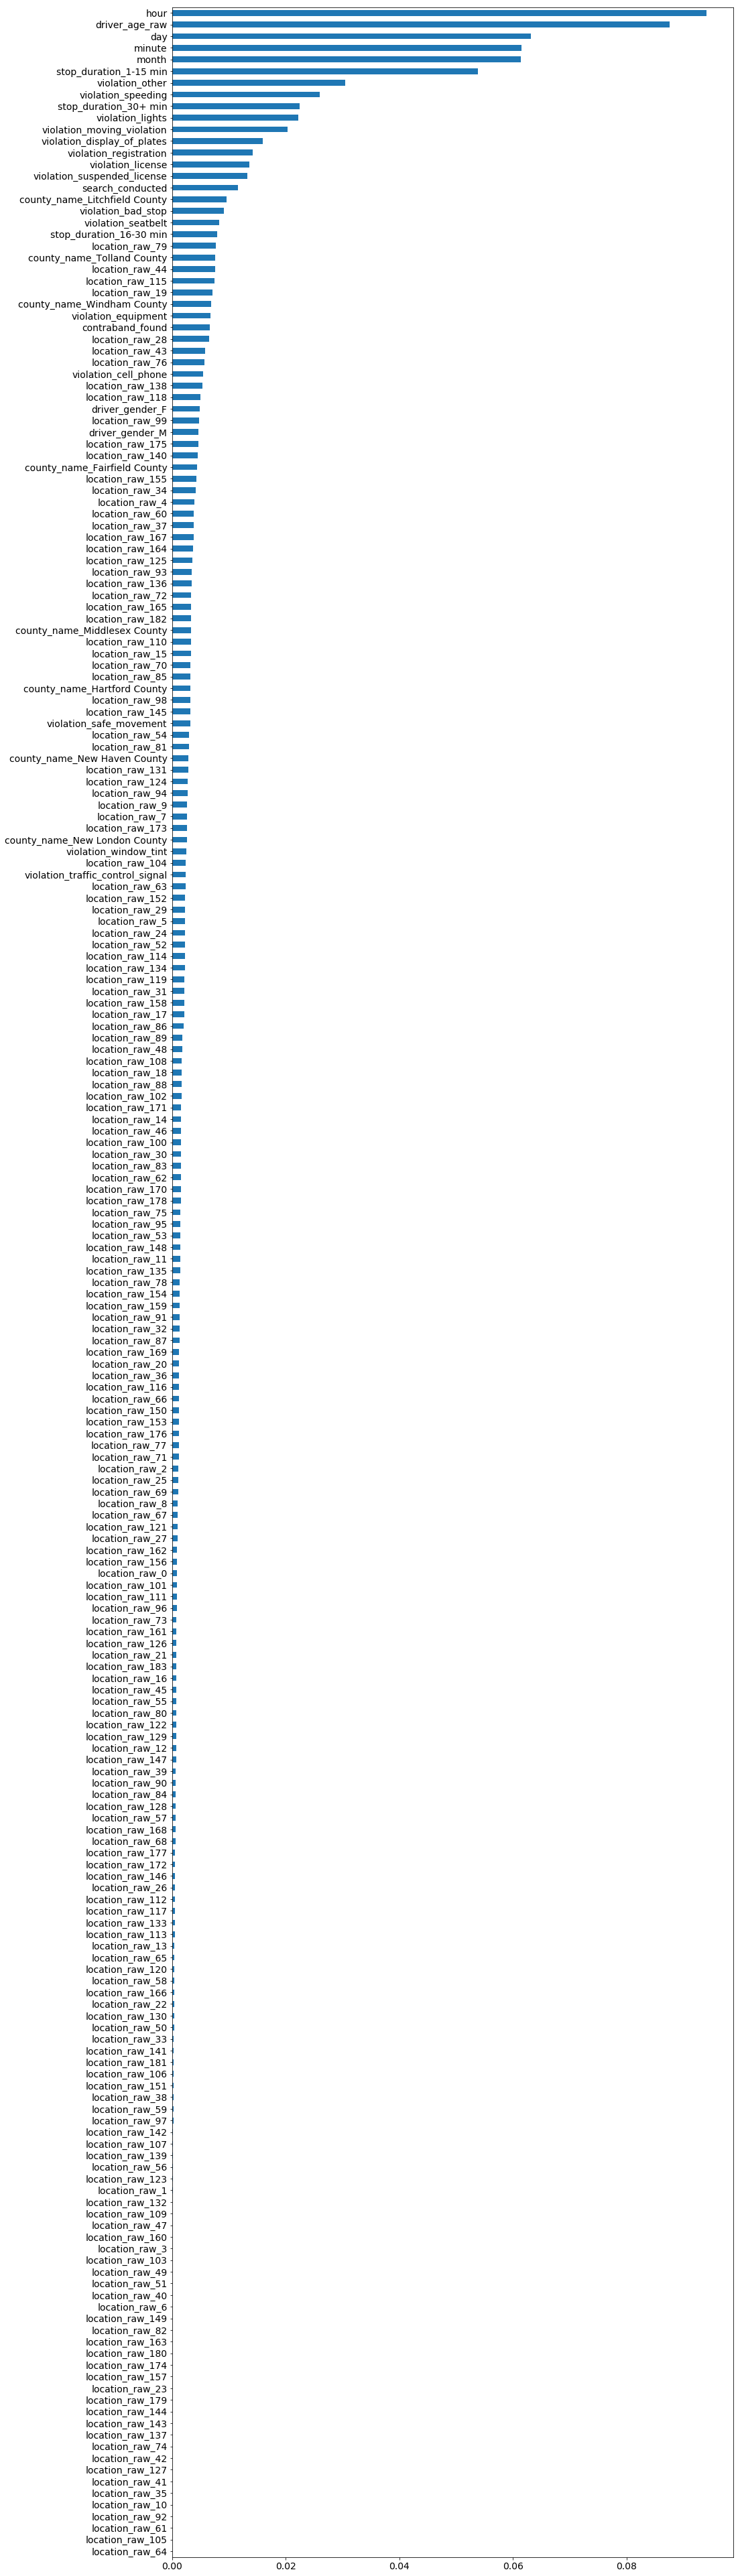

In [18]:
gbc_tuned_df = pd.DataFrame(data=clf['gbc_tuned'].clf.feature_importances_, index=X_train.columns.values)
gbc_tuned_plot = gbc_tuned_df.sort_values(by=0).plot.barh(figsize=(15, 70), fontsize=14)
gbc_tuned_plot.axes.legend().set_visible(False)

In [17]:
keys = clf.keys()
scores = [clf[key].score_val for key in keys]
results = pd.Series(scores, index=keys)
results

sgd          0.703134
gnb          0.207804
dtc          0.568991
rfc          0.702271
gbc          0.724468
gbc_tuned    0.728850
dtype: float64

<html xmlns="http://www.w3.org/1999/xhtml">
<!--This file was converted to xhtml by LibreOffice - see http://cgit.freedesktop.org/libreoffice/core/tree/filter/source/xslt for the code.-->

<head profile="http://dublincore.org/documents/dcmi-terms/">
    <meta http-equiv="Content-Type" content="application/xhtml+xml; charset=utf-8" />
    <title xml:lang="en-US">- no title specified</title>
    <meta name="DCTERMS.title" content="" xml:lang="en-US" />
    <meta name="DCTERMS.language" content="en-US" scheme="DCTERMS.RFC4646" />
    <meta name="DCTERMS.source" content="http://xml.openoffice.org/odf2xhtml" />
    <meta name="DCTERMS.issued" content="2018-05-21T11:27:34.761007696" scheme="DCTERMS.W3CDTF" />
    <meta name="DCTERMS.modified" content="2018-05-23T11:02:52.519496586" scheme="DCTERMS.W3CDTF" />
    <meta name="DCTERMS.provenance" content="" xml:lang="en-US" />
    <meta name="DCTERMS.subject" content="," xml:lang="en-US" />
    <link rel="schema.DC" href="http://purl.org/dc/elements/1.1/" hreflang="en" />
    <link rel="schema.DCTERMS" href="http://purl.org/dc/terms/" hreflang="en" />
    <link rel="schema.DCTYPE" href="http://purl.org/dc/dcmitype/" hreflang="en" />
    <link rel="schema.DCAM" href="http://purl.org/dc/dcam/" hreflang="en" />
    <style type="text/css">
        @page {}

        table {
            border-collapse: collapse;
            border-spacing: 0;
            empty-cells: show
        }

        td,
        th {
            vertical-align: top;
            font-size: 10pt;
        }

        h1,
        h2,
        h3,
        h4,
        h5,
        h6 {
            clear: both
        }

        ol,
        ul {
            margin: 0;
            padding: 0;
        }

        li {
            list-style: none;
            margin: 0;
            padding: 0;
        }

        < !-- "li span.odfLiEnd" - IE 7 issue-->li span. {
            clear: both;
            line-height: 0;
            width: 0;
            height: 0;
            margin: 0;
            padding: 0;
        }

        span.footnodeNumber {
            padding-right: 1em;
        }

        span.annotation_style_by_filter {
            font-size: 95%;
            font-family: Arial;
            background-color: #fff000;
            margin: 0;
            border: 0;
            padding: 0;
        }

        * {
            margin: 0;
        }

        .ta1 {
            writing-mode: lr-tb;
        }

        .Default {
            font-family: Liberation Sans;
        }

        .ce1 {
            font-family: Liberation Sans;
            font-size: 12pt;
            font-weight: bold;
        }

        .ce10 {
            font-family: Liberation Sans;
            font-size: 12pt;
            font-weight: normal;
        }

        .ce11 {
            font-family: Liberation Sans;
            vertical-align: middle;
            text-align: center ! important;
            margin-left: 0pt;
            font-size: 12pt;
            font-weight: bold;
        }

        .ce12 {
            font-family: Liberation Sans;
            text-align: center ! important;
            margin-left: 0pt;
            font-size: 12pt;
            font-weight: bold;
        }

        .ce13 {
            font-family: Liberation Sans;
            text-align: center ! important;
            margin-left: 0pt;
            font-size: 12pt;
        }

        .ce14 {
            font-family: Liberation Sans;
            background-color: transparent;
            text-align: center ! important;
            margin-left: 0pt;
            font-size: 12pt;
        }

        .ce15 {
            font-family: Liberation Sans;
            text-align: left ! important;
            margin-left: 0pt;
            font-size: 12pt;
        }

        .ce16 {
            font-family: Liberation Sans;
            font-size: 12pt;
        }

        .ce17 {
            font-family: Liberation Sans;
            background-color: transparent;
            font-size: 12pt;
        }

        .ce2 {
            font-family: Liberation Sans;
            font-size: 12pt;
            text-decoration: underline;
            font-weight: bold;
        }

        .ce3 {
            font-family: Liberation Sans;
            font-size: 12pt;
            font-weight: bold;
        }

        .ce4 {
            font-family: Liberation Sans;
            text-align: left ! important;
            margin-left: 0pt;
            font-size: 12pt;
            font-weight: bold;
        }

        .ce5 {
            font-family: Liberation Mono, Nimbus Mono L, DejaVu Sans Mono, Courier;
            font-size: 10pt;
            font-style: normal;
            text-shadow: none;
            text-decoration: none ! important;
            font-weight: normal;
        }

        .ce6 {
            font-family: Liberation Mono, Nimbus Mono L, DejaVu Sans Mono, Courier;
            background-color: transparent;
            font-size: 10pt;
            font-style: normal;
            text-shadow: none;
            text-decoration: none ! important;
            font-weight: normal;
        }

        .ce7 {
            font-family: Liberation Mono, Nimbus Mono L, DejaVu Sans Mono, Courier;
            font-size: 10pt;
            font-style: normal;
            text-shadow: none;
            text-decoration: none ! important;
            font-weight: bold;
        }

        .ce8 {
            font-family: Liberation Mono, Nimbus Mono L, DejaVu Sans Mono, Courier;
            font-size: 10pt;
            font-weight: normal;
        }

        .ce9 {
            font-family: Liberation Mono, Nimbus Mono L, DejaVu Sans Mono, Courier;
            font-size: 10pt;
            font-weight: bold;
        }

        .co1 {
            width: 213.45pt;
        }

        .co2 {
            width: 73.76pt;
        }

        .co3 {
            width: 64.01pt;
        }

        .ro1 {
            height: 15pt;
        }

        .ro2 {
            height: 22.99pt;
        }

        .ro3 {
            height: 23.24pt;
        }

        .ro4 {
            height: 12.81pt;
        }

        < !-- ODF styles with no properties representable as CSS --> {}
    </style>
</head>

<body dir="ltr">
    <table border="0" cellspacing="0" cellpadding="0" class="ta1">
        <colgroup>
            <col width="329" />
            <col width="114" />
            <col width="114" />
            <col width="114" />
            <col width="114" />
            <col width="114" />
            <col width="114" />
            <col width="114" />
            <col width="99" />
        </colgroup>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1"> </td>
            <td colspan="7" style="text-align:left;width:73.76pt; " class="ce11">
                <p><b>STAGES</b></p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce1"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce2">
                <p><b>FLAGS</b></p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce12">
                <p>1</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce12">
                <p>2</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce12">
                <p>3</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce12">
                <p>4</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce12">
                <p>5</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce12">
                <p>6</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce12">
                <p>7</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce1"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>include_location_raw</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce3">
                <p>include_driver_race</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>label_encode_categoricals</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>oversample</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>undersample</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13">
                <p>x</p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce2">
                <p><b>CLASSIFIER SCORES</b></p>
            </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:73.76pt; " class="ce13"> </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce2">
                <p>SGDClassifier</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.694371</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.707311</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.370454</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.704465</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.694838</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.703134</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.69509</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>GaussianNB</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.643051</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.202978</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.686507</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.685147</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.686523</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.207804</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.685847</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>DecisionTreeClassifier</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.537262</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.571481</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.559568</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.567211</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.553123</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.568991</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.556581</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>RandomForestClassifier</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.685543</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce14">
                <p>0.70189</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.696357</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.681789</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.693015</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.702271</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.69653</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>GradientBoostingClassifier</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce14">
                <p>0.718311</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce14">
                <p>0.724262</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.721336</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.711789</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.715451</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.724468</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.721238</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
        <tr class="ro1">
            <td style="text-align:left;width:213.45pt; " class="ce1">
                <p>GradientBoostingClassifier (Tuned)</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce14">
                <p>0.717432</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce14">
                <p>0.7285</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.728404</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.706416</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.70536</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.72885</p>
            </td>
            <td style="text-align:right; width:73.76pt; " class="ce13">
                <p>0.728466</p>
            </td>
            <td style="text-align:left;width:64.01pt; " class="ce16"> </td>
        </tr>
     </table>
</body>

</html>